#  3 CNN architectures (LeNet, VGG,  AlexNet (strides) )


## Practice

For this part you will be implementing 3 CNN architectures on the [EuroSat dataset](https://www.kaggle.com/datasets/apollo2506/eurosat-dataset), a collection of 27,000 labeled Sentinel-2 satellite images, categorized into 10 land cover classes. The following code loads the data and plots the first 5 sample images in the training set. Note that images are saved as 64x64x3 tensors (64x64 pixels of 3 (RGB) color channels).

In [1]:
import numpy as np; import tensorflow as tf; import requests; import zipfile; import io;
from PIL import Image; from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# RGB file URL
url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"

# Download and extract images
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    image_files = [f for f in z.namelist() if f.endswith(".jpg")]
    X_images = np.array([np.array(Image.open(z.open(f))) / 255.0 for f in image_files])
    labels = np.array([f.split('/')[1] for f in image_files])

# Convert labels to numerical values
unique_labels, y_labels = np.unique(labels, return_inverse=True)
print(unique_labels)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_images, y_labels, stratify=y_labels, train_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, train_size=0.5, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train, len(unique_labels))
y_val = to_categorical(y_val, len(unique_labels))
y_test = to_categorical(y_test, len(unique_labels))

# Print data dimensions
print(f"Training data dimensions X = {X_train.shape}, Y = {y_train.shape}")
print(f"Validation data dimensions X = {X_val.shape}, Y = {y_val.shape}")
print(f"Testing data dimensions X = {X_test.shape}, Y = {y_test.shape}")

['AnnualCrop' 'Forest' 'HerbaceousVegetation' 'Highway' 'Industrial'
 'Pasture' 'PermanentCrop' 'Residential' 'River' 'SeaLake']
Training data dimensions X = (13500, 64, 64, 3), Y = (13500, 10)
Validation data dimensions X = (6750, 64, 64, 3), Y = (6750, 10)
Testing data dimensions X = (6750, 64, 64, 3), Y = (6750, 10)


`to_categorical(y_train, len(unique_labels))`: Converts the integer labels into one-hot encoded vectors. For example, if there are 3 unique classes, and the label is 1, it will be converted to [0, 1, 0]. This is necessary for training neural networks, especially when using softmax activation in the output layer, which requires categorical labels to be in a one-hot format.

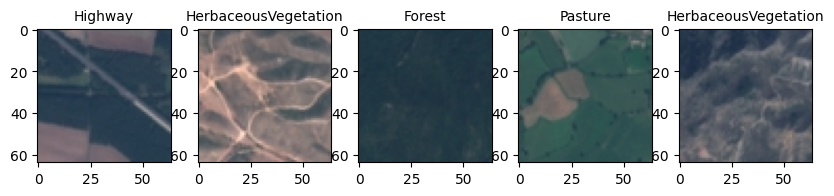

In [2]:
from matplotlib import pyplot as plt
# Plot sample images and labels:
fig=plt.figure(figsize=(10, 10))
columns = 5
for i in range(columns):
  fig.add_subplot(1, columns, i+1)
  plt.imshow(X_train[i])
  plt.title(unique_labels[ np.where(y_train[i])[0][0] ], fontsize=10)
plt.show()

You will now implement the following 3 architectures, based on their Keras summary table:
1.   LeNet
2.   VGG
3.   AlexNet


## Architecture 1: LeNet
Implement LeNet architecture as described below.
Add the necessary layers using the Keras functional API.
The test accuracy should be greater than 60%.

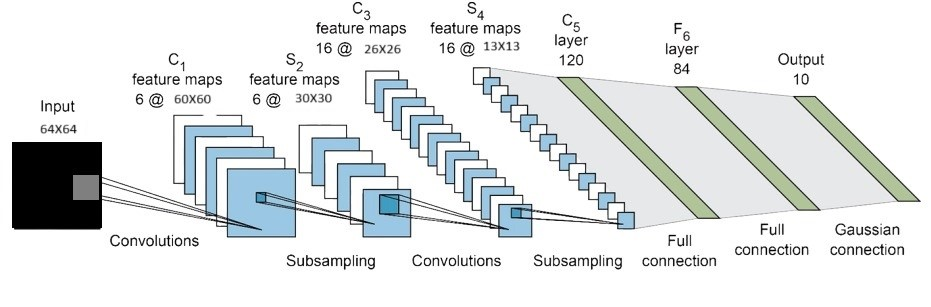

In [3]:
import numpy as np; import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

## your code here

X_input = layers.Input((64,64,3))
X = layers.Conv2D(6, (5, 5), activation='relu')(X_input)
X = layers.MaxPooling2D((2, 2))(X)
X = layers.Conv2D(16, (5, 5), activation='relu')(X)
X = layers.MaxPooling2D((2, 2))(X)
X = layers.Flatten()(X)
X = layers.Dense(120, activation='relu')(X)
X = layers.Dense(84, activation='relu')(X)
X = layers.Dense(10)(X)
X = layers.Softmax()(X)

model_1 = models.Model(inputs=X_input, outputs=X, name="Model_1")


In [4]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],)
model_1.summary()


Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 60, 60, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         324,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 338,486 (1.29 MB)

 Trainable params: 338,486 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history_1 = model_1.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=10, batch_size=64 )

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.1545 - loss: 2.2045 - val_accuracy: 0.3231 - val_loss: 1.7271
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3813 - loss: 1.6207 - val_accuracy: 0.4487 - val_loss: 1.4477
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4400 - loss: 1.4059 - val_accuracy: 0.4695 - val_loss: 1.3459
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4611 - loss: 1.3320 - val_accuracy: 0.5025 - val_loss: 1.2742
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5016 - loss: 1.2666 - val_accuracy: 0.5188 - val_loss: 1.2499
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5336 - loss: 1.2243 - val_accuracy: 0.5664 - val_loss: 1.1688
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5616 - loss: 1.1520 - val_accuracy: 0.5751 - val_loss: 1.1417
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5934 - loss: 1.1050 - val_accuracy: 

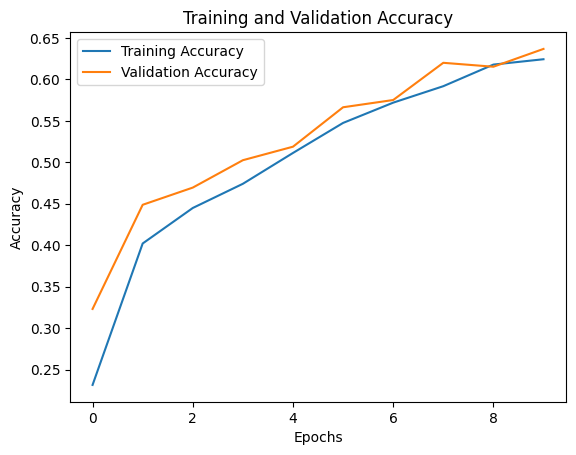

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6278 - loss: 1.0369
Average test loss for model 1:  1.024345874786377
Average test accuracy for model 1:  0.6354073882102966


In [6]:
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.show()

model_1_test_loss, model_1_test_acc = model_1.evaluate(X_test,  y_test)
print("Average test loss for model 1: ", np.mean(model_1_test_loss))
print("Average test accuracy for model 1: ", np.mean(model_1_test_acc))

## Architecture 2: VGG
Implement VGG as described in the model summary below. The test accuracy should be greater than 80%.


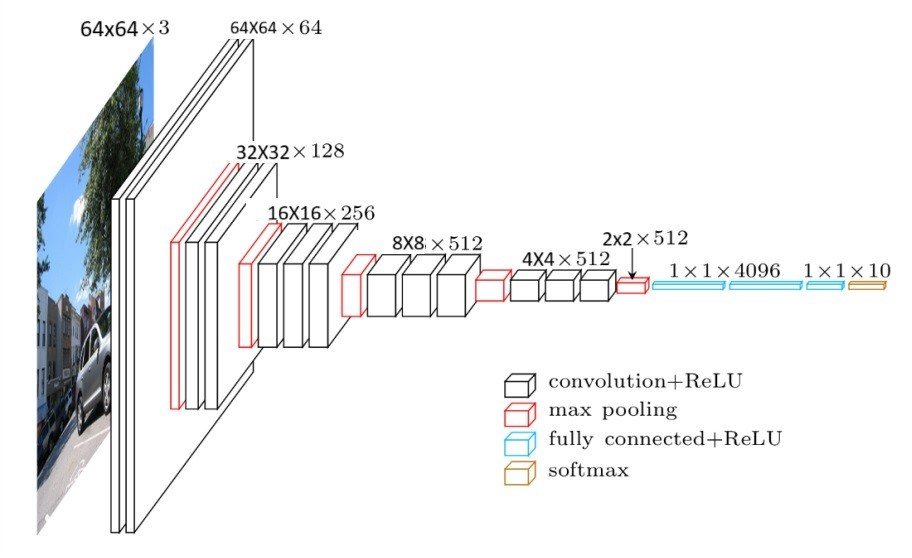

In [7]:
import numpy as np; import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

X_input = layers.Input((64,64,3))
X = layers.Conv2D(64, (3, 3), activation='relu', padding="same")(X_input)
X = layers.Conv2D(64, (3, 3), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((2, 2))(X)
X = layers.Conv2D(128, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(128, (3, 3), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((2, 2))(X)
X = layers.Conv2D(256, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(256, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(256, (3, 3), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((2, 2))(X)
X = layers.Conv2D(512, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(512, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(512, (3, 3), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((2, 2))(X)
X = layers.Conv2D(512, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(512, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(512, (3, 3), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((2, 2))(X)
X = layers.Flatten()(X)
X = layers.Dense(4096, activation='relu')(X)
X = layers.Dense(10)(X)
X = layers.Softmax()(X)

model_2 = models.Model(inputs=X_input, outputs=X, name="Model_2")


In [8]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],)
model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,148,362 (88.30 MB)

 Trainable params: 23,148,362 (88.30 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_2 = model_2.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 54s 189ms/step - accuracy: 0.2038 - loss: 2.0044 - val_accuracy: 0.3523 - val_loss: 1.4771
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 57s 118ms/step - accuracy: 0.4472 - loss: 1.3583 - val_accuracy: 0.6049 - val_loss: 1.0910
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 43s 127ms/step - accuracy: 0.6053 - loss: 1.0762 - val_accuracy: 0.6879 - val_loss: 0.8721
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.6942 - loss: 0.8383 - val_accuracy: 0.7279 - val_loss: 0.7416
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.7417 - loss: 0.7033 - val_accuracy: 0.7803 - val_loss: 0.6257
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.7847 - loss: 0.6003 - val_accuracy: 0.7736 - val_loss: 0.6395
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.8014 - loss: 0.5351 - val_accuracy: 0.8041 - val_loss: 0.5631
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.8199 - loss: 0

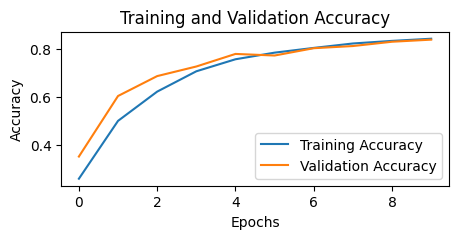

211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8443 - loss: 0.4493
Average test loss for model 2:  0.4496345818042755
Average test accuracy for model 2:  0.8422222137451172


In [10]:
plt.figure(figsize=(5, 2))
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

model_2_test_loss, model_2_test_acc = model_2.evaluate(X_test,  y_test)
print("Average test loss for model 2: ", np.mean(model_2_test_loss))
print("Average test accuracy for model 2: ", np.mean(model_2_test_acc))

## Architecture 3: AlexNet (strides)

Implement AlexNet architecture, adjusted for the image input size,  as described in the model summary below. The test accuracy should be greater than 70%.

In [11]:
import numpy as np; import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

X_input = layers.Input((64,64,3))
X = layers.Conv2D(96, (11, 11), activation='relu')(X_input)
X = layers.MaxPooling2D((3, 3), strides=(2,2))(X)
X = layers.Conv2D(256, (5, 5), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((3, 3), strides=(2,2))(X)
X = layers.Conv2D(384, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(384, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(256, (3, 3), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((3, 3), strides=(2,2))(X)
X = layers.Flatten()(X)
X = layers.Dense(4096, activation='relu')(X)
X = layers.Dense(4096, activation='relu')(X)
X = layers.Dense(10)(X)
X = layers.Softmax()(X)

model_3 = models.Model(inputs=X_input, outputs=X, name="Model_3")

In [12]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],)
model_3.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │          40,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,787,978 (178.48 MB)

 Trainable params: 46,787,978 (178.48 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_3 = model_3.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=10, batch_size=64 )

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 43s 158ms/step - accuracy: 0.3055 - loss: 1.7439 - val_accuracy: 0.6049 - val_loss: 1.0912
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.5864 - loss: 1.1173 - val_accuracy: 0.6639 - val_loss: 0.9088
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.6496 - loss: 0.9484 - val_accuracy: 0.7184 - val_loss: 0.7839
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.6986 - loss: 0.8197 - val_accuracy: 0.6641 - val_loss: 0.9124
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.7237 - loss: 0.7464 - val_accuracy: 0.7359 - val_loss: 0.7395
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.7526 - loss: 0.6940 - val_accuracy: 0.7747 - val_loss: 0.6237
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.7648 - loss: 0.6261 - val_accuracy: 0.7348 - val_loss: 0.7343
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.7722 - loss: 0.6316 -

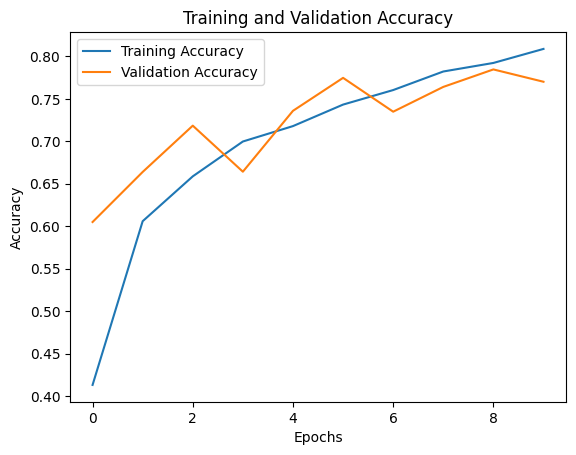

211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7748 - loss: 0.6222
Average test loss for model 3:  0.6243478059768677
Average test accuracy for model 3:  0.775259256362915


In [14]:
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.show()

model_3_test_loss, model_3_test_acc = model_3.evaluate(X_test,  y_test)
print("Average test loss for model 3: ", np.mean(model_3_test_loss))
print("Average test accuracy for model 3: ", np.mean(model_3_test_acc))

### Figure - AlexNet (strides)

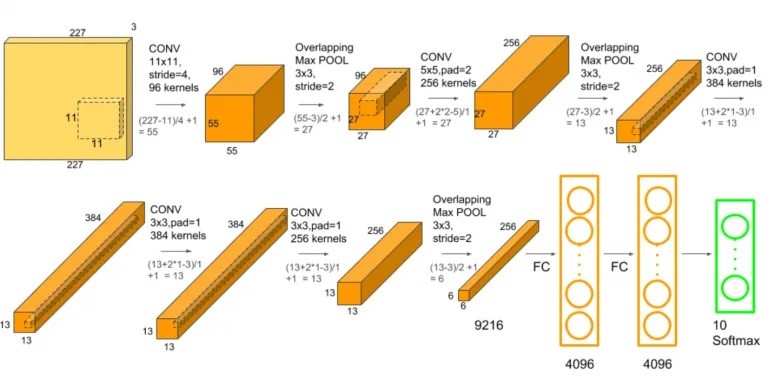

In [15]:
import numpy as np; import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

X_input = layers.Input((227,227,3))
X = layers.Conv2D(96, (11, 11),strides=(4,4), activation='relu')(X_input)
X = layers.MaxPooling2D((3, 3), strides=(2,2))(X)
X = layers.Conv2D(256, (5, 5), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((3, 3), strides=(2,2))(X)
X = layers.Conv2D(384, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(384, (3, 3), activation='relu', padding="same")(X)
X = layers.Conv2D(256, (3, 3), activation='relu', padding="same")(X)
X = layers.MaxPooling2D((3, 3), strides=(2,2))(X)
X = layers.Flatten()(X)
X = layers.Dense(4096, activation='relu')(X)
X = layers.Dense(4096, activation='relu')(X)
X = layers.Dense(10)(X)
X = layers.Softmax()(X)

model_4 = models.Model(inputs=X_input, outputs=X, name="Model_3")

model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],)
model_4.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 227, 227, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │          40,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_3 (Softmax)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

#### Challenge:
Can you come up with a model that out performs all the above models in the same dataset?
You can use the any of the previous models and make changes to improve it, or you can come up with you own model from scratch.
Hint: Think about skip connections, batch normalization, dropouts ;)
